<a href="https://colab.research.google.com/github/Sangamithra546/DataScienceLabManual231801147/blob/main/EX6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [3]:
df = pd.read_csv("/content/airline-passengers.csv")

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [6]:
print(df.describe())

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [7]:
print(df.isnull().sum())

Month         0
Passengers    0
dtype: int64


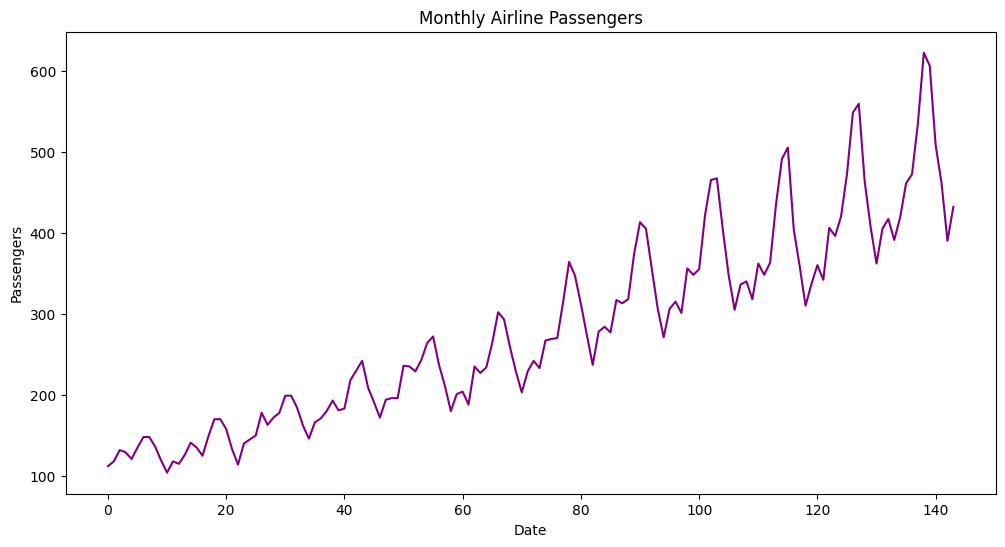

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], color='purple')
plt.title("Monthly Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.show()

In [17]:
result = adfuller(df['Passengers'])
print('ADF Statistic:',result[0])
print('p-value',result[1])
for key, value in result[4].items():
  print("Critical values:",key,value)

ADF Statistic: 0.8153688792060498
p-value 0.991880243437641
Critical values: 1% -3.4816817173418295
Critical values: 5% -2.8840418343195267
Critical values: 10% -2.578770059171598


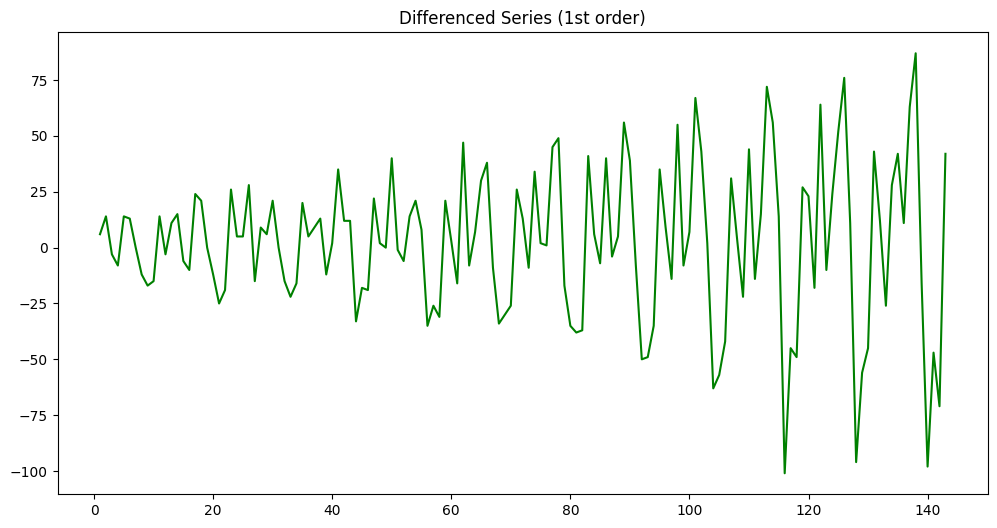

In [27]:
df_diff = df.diff().dropna()
plt.figure(figsize=(12,6))
plt.plot(df_diff['Passengers'],color='green')
plt.title('Differenced Series (1st order)')
plt.show()

In [29]:
result_diff = adfuller(df_diff['Passengers'])
print("ADF Statistic",result_diff[0])
print("p_value",result_diff[1])

ADF Statistic -2.8292668241700047
p_value 0.05421329028382478


In [31]:
df_diff2 = df_diff.diff().dropna()

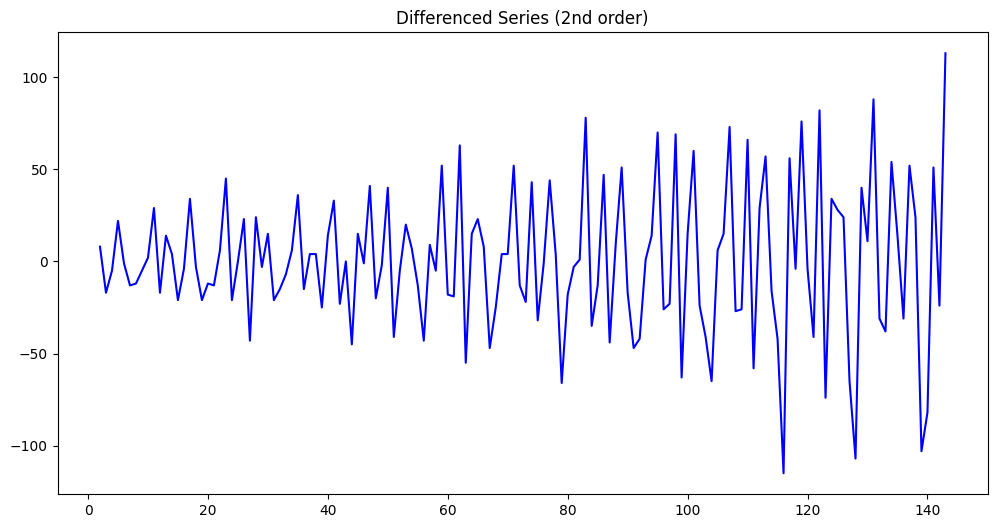

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df_diff2['Passengers'],color='blue')
plt.title('Differenced Series (2nd order)')
plt.show()

In [35]:
result_diff2 = adfuller(df_diff2['Passengers'])
print("ADF Statistic",result_diff2[0])
print("p_value",result_diff2[1])

ADF Statistic -16.384231542468513
p_value 2.7328918500142026e-29


In [37]:
df_log = np.log(df['Passengers'])
df_log_diff = df_log.diff().dropna()
result_log_diff = adfuller(df_log_diff)
print('ADF Statistic (log + diff):', result_log_diff[0])
print('p-value (log + diff):', result_log_diff[1])

ADF Statistic (log + diff): -2.717130598388114
p-value (log + diff): 0.07112054815086184


In [38]:
train_size = int(len(df)*0.8)
train,test = df[:train_size],df[train_size:]

In [45]:
train_series = train['Passengers']

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_series, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -523.084
Date:                Tue, 16 Sep 2025   AIC                           1056.169
Time:                        11:04:38   BIC                           1069.806
Sample:                             0   HQIC                          1061.702
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5036      0.122     -4.143      0.000      -0.742      -0.265
ar.L2          0.0912      0.099      0.921      0.357      -0.103       0.285
ma.L1         -0.0552     24.247     -0.002      0.9

In [46]:
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

In [48]:
mse = mean_squared_error(test['Passengers'], forecast)
mae = mean_absolute_error(test['Passengers'], forecast)
rmse = math.sqrt(mse)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MSE: 18381.74
MAE: 120.27
RMSE: 135.58


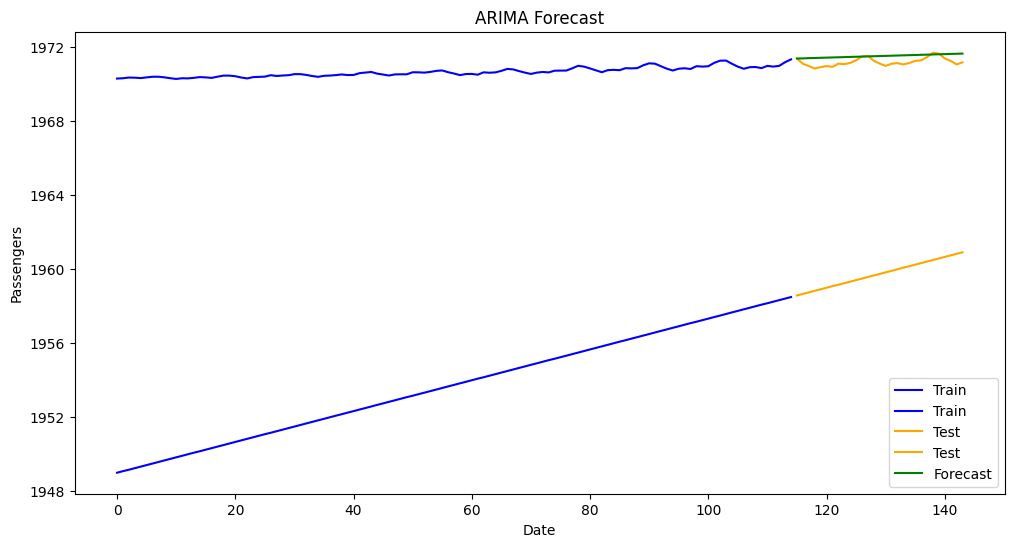

In [49]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()